## Sales Analysis

In [1]:
import os
import pandas as pd

#### Merge data from each month into one csv

In [2]:
path='./Sales_Data'

files=[file for file in os.listdir(path) if not file.startswith('.')]# ignore hidden files

files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [6]:
all_months_data=pd.DataFrame()
for file in files:
    current_data=pd.read_csv(path+'/'+file)
    all_months_data=pd.concat([all_months_data,current_data])
all_months_data.to_csv('all_data_copy.csv',index=False)

In [3]:
all_data=pd.read_csv('all_data_copy.csv')
len(all_data)

186850

In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Clean up the data!

**Drop rows of Nan**

In [5]:
nan_df=all_data.isna().sum()
nan_df

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [7]:
nan_df=all_data.isna().sum()
nan_df

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### Get rid of text in order date column

In [8]:
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']

In [9]:
all_data['Order Date'].dtype

dtype('O')

#### Make columns correct type

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [11]:
all_data['Quantity Ordered'].dtype

dtype('int64')

### Augmented data with additional columns

**Add month columns**

In [12]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
all_data['Month']=all_data['Order Date'].str[0:2]
all_data.Month=all_data.Month.astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add City column

In [14]:
def get_city(address):
    return address.split(',')[1].strip(" ")
def get_state(address):
    return address.split(',')[2].split(" ")[1]
all_data['city']=all_data['Purchase Address'].apply(lambda x:f"{get_city(x)}({get_state(x)})")

In [15]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA)


### Data Exploration

**Question 1: What was the best month for sales ? How much was earned in that month?**

In [16]:
all_data['Sales']=all_data['Quantity Ordered'].astype('int')*  all_data['Price Each'].astype('float')

In [17]:
all_data.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


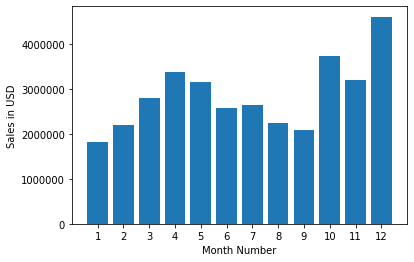

In [18]:
import matplotlib.pyplot as plt

months=range(1,13)
plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.xlabel('Month Number')
plt.ylabel('Sales in USD')
plt.show()

In [19]:
10903*1.811768e+06

19753706504.0

**Question 2: What city sold the most product?**

In [20]:
all_data.groupby(['city']).sum()

,Quantity Ordered,Price Each,Month,Sales
city,,,,
Atlanta(GA),16602,2.779908e+06,104794,2.795499e+06
Austin(TX),11153,1.809874e+06,69829,1.819582e+06
Boston(MA),22528,3.637410e+06,141112,3.661642e+06
Dallas(TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles(CA),33289,5.421435e+06,208325,5.452571e+06
New York City(NY),27932,4.635371e+06,175741,4.664317e+06
Portland(ME),2750,4.471893e+05,17144,4.497583e+05
Portland(OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco(CA),50239,8.211462e+06,315520,8.262204e+06


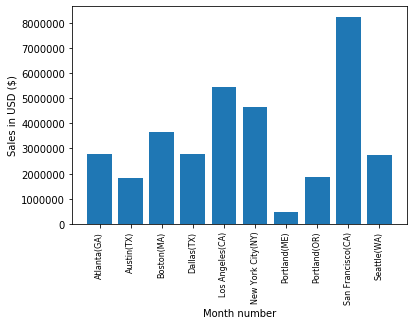

In [21]:

key=[x for x,df in all_data.groupby(['city'])]

plt.bar(key,all_data.groupby(['city']).sum()['Sales'])

plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(key,rotation='vertical',size=8);


**Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?**

In [23]:
all_data['Hour']=pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute']=pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count']=1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,9,27,1


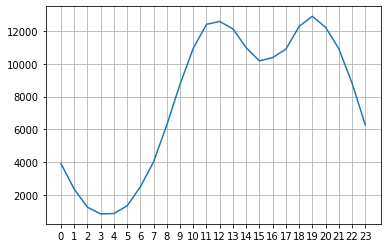

In [65]:
key=[x for x,df in all_data.groupby(['Hour'])]
plt.plot(key,all_data.groupby(['Hour']).count()['Count'])
plt.xticks(key)
plt.grid()

**Question 4: What products are most often sold together?**

In [66]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

<ipython-input-66-6a568178df4a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [67]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [24]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,city,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas(TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston(MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles(CA),11.99,9,27,1


#### What product sold the most? why do you think it sold the most?

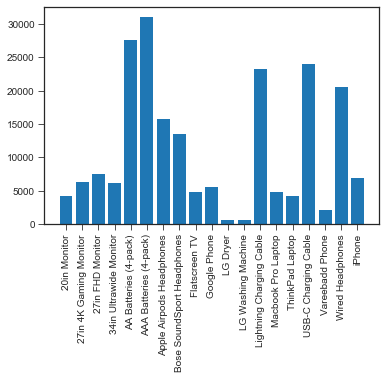

In [40]:
product_group=all_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']

keys=[x for x,df in product_group]
plt.bar(keys,quantity_ordered)
plt.xticks(keys,rotation='vertical')
plt.show()

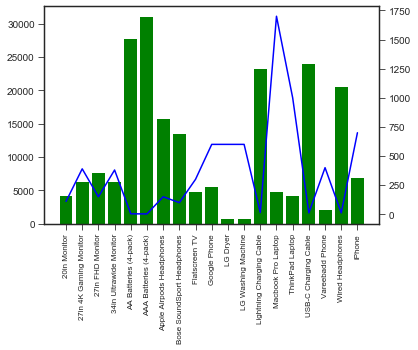

In [41]:
prices=all_data.groupby('Product').mean()['Price Each']

fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(keys,quantity_ordered,color='g')
ax2.plot(keys,prices,color='b')

ax1.set_xticklabels(keys, rotation='vertical', size=8);


In [39]:
plt.style.use('seaborn-ticks')